## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.065262 -1.440076 -1.079713 -1.088992 -1.024452 -1.734715
1  1.618308  1.643817  1.285072 -0.388511 -1.596841 -0.931330
2  0.857148  1.423508  0.247141 -0.088747 -1.635968 -0.048141
3  1.168274  1.116063  0.744122  1.161131 -0.450797  1.315751
4  1.481489  1.203744  0.607527  0.678804  1.451519  1.163245


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9642361	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9543516	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9446171	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9360004	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9274247	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9192143	total: 60ms	remaining: 9.94s
6:	learn: 0.9100822	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9006413	total: 60.9ms	remaining: 7.55s
8:	learn: 0.8919724	total: 61.4ms	remaining: 6.76s
9:	learn: 0.8829514	total: 62ms	remaining: 6.14s
10:	learn: 0.8743354	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8654968	total: 63ms	remaining: 5.19s
12:	learn: 0.8570868	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8497247	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8434968	total: 64.5ms	remaining: 4.23s
15:	learn: 0.8374868	total: 65ms	remaining: 4s
16:	learn: 0.8294385	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8229994	total: 66ms	remaining: 3.6s
18:	learn: 0.8150460	total: 66.5ms	remaining: 3.43s
19:	lea

108:	learn: 0.3935607	total: 108ms	remaining: 881ms
109:	learn: 0.3910949	total: 108ms	remaining: 878ms
110:	learn: 0.3880467	total: 109ms	remaining: 872ms
111:	learn: 0.3851883	total: 109ms	remaining: 866ms
112:	learn: 0.3824678	total: 110ms	remaining: 860ms
113:	learn: 0.3800905	total: 110ms	remaining: 856ms
114:	learn: 0.3776019	total: 110ms	remaining: 850ms
115:	learn: 0.3751152	total: 111ms	remaining: 845ms
116:	learn: 0.3726459	total: 111ms	remaining: 841ms
117:	learn: 0.3708120	total: 112ms	remaining: 837ms
118:	learn: 0.3683556	total: 112ms	remaining: 833ms
119:	learn: 0.3655931	total: 113ms	remaining: 829ms
120:	learn: 0.3633374	total: 113ms	remaining: 824ms
121:	learn: 0.3608615	total: 114ms	remaining: 821ms
122:	learn: 0.3580634	total: 115ms	remaining: 817ms
123:	learn: 0.3556957	total: 115ms	remaining: 812ms
124:	learn: 0.3532849	total: 116ms	remaining: 809ms
125:	learn: 0.3508811	total: 116ms	remaining: 804ms
126:	learn: 0.3479702	total: 116ms	remaining: 799ms
127:	learn: 

273:	learn: 0.1347676	total: 187ms	remaining: 494ms
274:	learn: 0.1339293	total: 187ms	remaining: 494ms
275:	learn: 0.1331003	total: 188ms	remaining: 493ms
276:	learn: 0.1322567	total: 188ms	remaining: 491ms
277:	learn: 0.1312741	total: 189ms	remaining: 490ms
278:	learn: 0.1303207	total: 189ms	remaining: 489ms
279:	learn: 0.1295671	total: 190ms	remaining: 488ms
280:	learn: 0.1288372	total: 190ms	remaining: 487ms
281:	learn: 0.1280212	total: 191ms	remaining: 485ms
282:	learn: 0.1272260	total: 191ms	remaining: 484ms
283:	learn: 0.1264600	total: 191ms	remaining: 483ms
284:	learn: 0.1255179	total: 192ms	remaining: 482ms
285:	learn: 0.1247358	total: 192ms	remaining: 480ms
286:	learn: 0.1239833	total: 193ms	remaining: 479ms
287:	learn: 0.1231877	total: 193ms	remaining: 477ms
288:	learn: 0.1225398	total: 194ms	remaining: 476ms
289:	learn: 0.1218502	total: 194ms	remaining: 475ms
290:	learn: 0.1209069	total: 194ms	remaining: 474ms
291:	learn: 0.1201388	total: 195ms	remaining: 472ms
292:	learn: 

494:	learn: 0.0427936	total: 290ms	remaining: 296ms
495:	learn: 0.0426400	total: 291ms	remaining: 295ms
496:	learn: 0.0424901	total: 291ms	remaining: 295ms
497:	learn: 0.0423334	total: 292ms	remaining: 294ms
498:	learn: 0.0421798	total: 292ms	remaining: 293ms
499:	learn: 0.0420279	total: 293ms	remaining: 293ms
500:	learn: 0.0418796	total: 294ms	remaining: 292ms
501:	learn: 0.0417393	total: 294ms	remaining: 292ms
502:	learn: 0.0415920	total: 294ms	remaining: 291ms
503:	learn: 0.0414440	total: 295ms	remaining: 290ms
504:	learn: 0.0413009	total: 295ms	remaining: 290ms
505:	learn: 0.0410993	total: 296ms	remaining: 289ms
506:	learn: 0.0409580	total: 296ms	remaining: 288ms
507:	learn: 0.0407992	total: 297ms	remaining: 287ms
508:	learn: 0.0406595	total: 297ms	remaining: 287ms
509:	learn: 0.0405222	total: 298ms	remaining: 286ms
510:	learn: 0.0403672	total: 298ms	remaining: 285ms
511:	learn: 0.0402480	total: 298ms	remaining: 284ms
512:	learn: 0.0400136	total: 299ms	remaining: 284ms
513:	learn: 

657:	learn: 0.0229442	total: 370ms	remaining: 192ms
658:	learn: 0.0228824	total: 370ms	remaining: 192ms
659:	learn: 0.0228197	total: 371ms	remaining: 191ms
660:	learn: 0.0227904	total: 371ms	remaining: 190ms
661:	learn: 0.0227615	total: 372ms	remaining: 190ms
662:	learn: 0.0226638	total: 372ms	remaining: 189ms
663:	learn: 0.0225771	total: 373ms	remaining: 189ms
664:	learn: 0.0225488	total: 373ms	remaining: 188ms
665:	learn: 0.0224637	total: 374ms	remaining: 187ms
666:	learn: 0.0224198	total: 374ms	remaining: 187ms
667:	learn: 0.0223505	total: 375ms	remaining: 186ms
668:	learn: 0.0223227	total: 375ms	remaining: 186ms
669:	learn: 0.0222953	total: 376ms	remaining: 185ms
670:	learn: 0.0222141	total: 376ms	remaining: 184ms
671:	learn: 0.0220924	total: 376ms	remaining: 184ms
672:	learn: 0.0220658	total: 377ms	remaining: 183ms
673:	learn: 0.0219983	total: 377ms	remaining: 183ms
674:	learn: 0.0218881	total: 378ms	remaining: 182ms
675:	learn: 0.0218586	total: 378ms	remaining: 181ms
676:	learn: 

878:	learn: 0.0105558	total: 474ms	remaining: 65.3ms
879:	learn: 0.0105133	total: 475ms	remaining: 64.7ms
880:	learn: 0.0104598	total: 475ms	remaining: 64.2ms
881:	learn: 0.0104186	total: 475ms	remaining: 63.6ms
882:	learn: 0.0103665	total: 476ms	remaining: 63ms
883:	learn: 0.0103159	total: 476ms	remaining: 62.5ms
884:	learn: 0.0102593	total: 477ms	remaining: 61.9ms
885:	learn: 0.0102196	total: 477ms	remaining: 61.4ms
886:	learn: 0.0101837	total: 477ms	remaining: 60.8ms
887:	learn: 0.0101345	total: 478ms	remaining: 60.2ms
888:	learn: 0.0101212	total: 478ms	remaining: 59.7ms
889:	learn: 0.0101083	total: 478ms	remaining: 59.1ms
890:	learn: 0.0100700	total: 479ms	remaining: 58.6ms
891:	learn: 0.0100350	total: 479ms	remaining: 58ms
892:	learn: 0.0099875	total: 480ms	remaining: 57.5ms
893:	learn: 0.0099748	total: 480ms	remaining: 56.9ms
894:	learn: 0.0099243	total: 481ms	remaining: 56.4ms
895:	learn: 0.0099119	total: 481ms	remaining: 55.9ms
896:	learn: 0.0098997	total: 482ms	remaining: 55.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

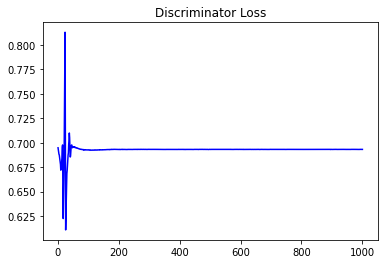

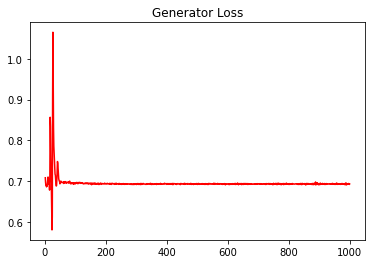

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.20710313726721835


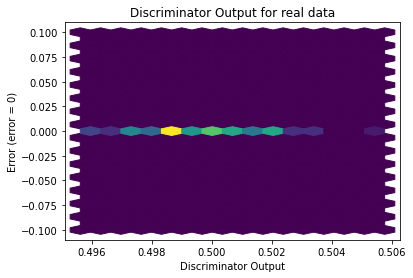

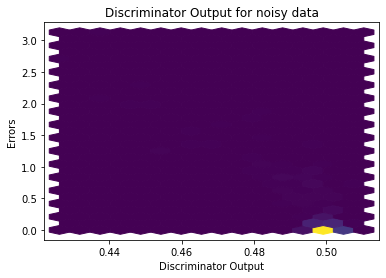

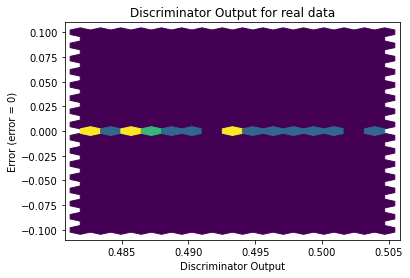

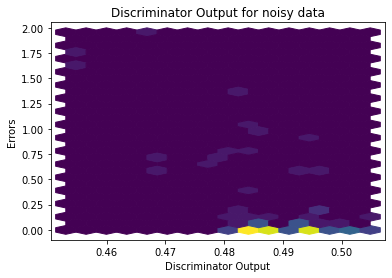

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


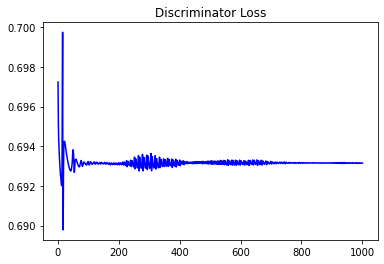

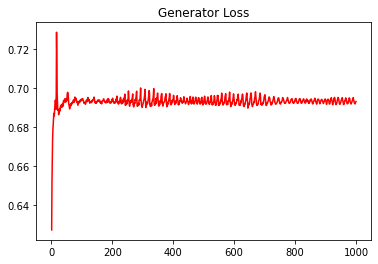

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.26919190177797897


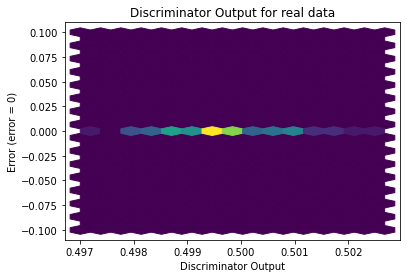

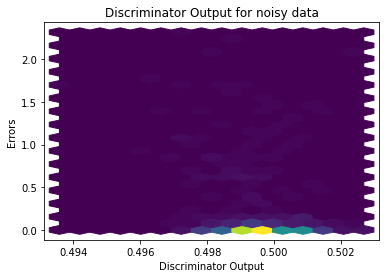

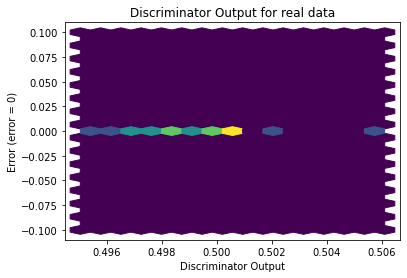

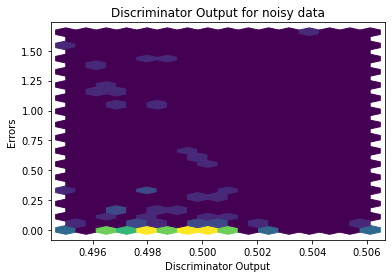

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0401]], requires_grad=True)
